<a href="https://colab.research.google.com/github/rahiakela/python-for-programmers-practice/blob/object-oriented-programming/time_series_with_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series with Simple Linear Regression

## Motivation

We’ll discuss time series, which are sequences of values (called observations) associated with points in time. Some examples are:-
* daily closing stock prices, 
* hourly temperature readings, 
* the changing positions of a plane in flight, 
* annual crop yields and
* quarterly company profits. 

Perhaps the ultimate time series is the stream of time-stamped tweets coming from Twitter users worldwide.

In this section, we’ll use a technique called simple linear regression to make predictions from time series data. We’ll use the 1895 through 2018 January average high temperatures in New York City to predict future average January high temperatures and to estimate the average January high temperatures for years preceding 1895.

This would be our through practical guide as follow:-
* In the **Machine Learning** using the scikit-learn library
* In the **Deep Learning** using recurrent neural networks (RNNs) to analyze time series

## Time Series

The data we’ll use is a time series in which the observations are ordered by year.
* **Univariate** - time series have one observation per time, such as the average of the January high temperatures in New York City for a particular year.

* **Multivariate** - time series have two or more observations per time, such as temperature, humidity and barometric pressure readings in a weather application. 

Here, we’ll analyze a univariate time series.

Two tasks often performed with time series are:
* **Time series analysis** - which looks at existing time series data for patterns, helping data analysts understand the data. A common analysis task is to look for seasonality in the data.
* **Time series forecasting** - which uses past data to predict the future.

We’ll perform time series forecasting in this section.

## Simple Linear Regression

Using a technique called simple linear regression, we’ll make predictions by finding a linear relationship between the months (January of each year) and New York City’s average January high temperatures.

Given a collection of values representing:-
* **Independent variable** - (the month/year combination) and 
* **Dependent variable** - (the average high temperature for that month/year), 

Simple linear regression describes the relationship between these variables with a straight line, known as the regression line.

## Linear Relationships

To understand the general concept of a linear relationship, consider Fahrenheit and Celsius temperatures. Given a Fahrenheit temperature, we can calculate the corresponding Celsius temperature using the following formula:

$$c = 5 / 9 * (f - 32)$$

In this formula:-
* **f** (the Fahrenheit temperature) is the independent variable, and
* **c** (the Celsius temperature) is the dependent variable

Each value of **c** depends on the value of **f** used in the calculation.

In [0]:
c = lambda f: 5 / 9 * (f - 32)
temp = [(f, c(f)) for f in range(0, 101, 10)]

Let's plot to display the linear relationship between the Fahrenheit and Celsius temperatures.

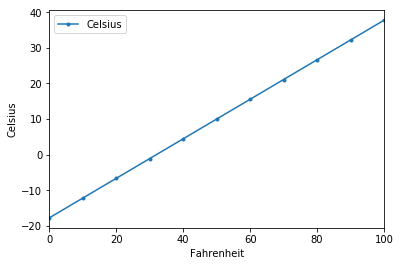

In [6]:
import pandas as pd
 
temps_df = pd.DataFrame(temp, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')